# Random Forest Model + Explainable AI Techniques (XAI)

## Import and Reading Data

In [1]:
import pandas as pd
import numpy as np
import joblib

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# LIME
from interpret.blackbox import LimeTabular
from lime.lime_tabular import LimeTabularExplainer
from interpret import show

# SHAP
import shap

In [2]:
df_train = pd.read_csv("../../0_Datasets/IoMT_AI_IDS/Flows/train.csv")

In [3]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.674434,-0.621972,-0.450908,-0.746950,-0.572718,-0.467121,-0.530517,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
1,-0.722124,-0.725850,-0.546365,-0.746950,-0.572239,-0.466783,-0.530104,0.232052,-0.727991,0.002967,...,-0.517239,-0.824912,-0.557857,-0.527991,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
2,-0.674434,-0.621972,-0.450908,-0.746950,-0.572705,-0.467112,-0.530505,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
3,-0.674434,-0.621972,-0.450908,-0.746950,-0.572649,-0.467072,-0.530456,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
4,-0.865193,-0.933607,-0.928195,-0.746950,-0.054334,0.273648,0.143245,2.515023,-0.871428,0.002967,...,-0.519508,-0.829911,-0.565532,-0.531550,-0.792487,-0.788171,-0.806943,-0.992819,rudeadyet,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60883,-0.674434,-0.621972,-0.450908,-0.746950,-0.572671,-0.467088,-0.530476,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
60884,1.471606,1.455598,1.458239,1.467491,-0.477501,-0.437955,-0.471839,-0.909433,1.471377,0.002967,...,-0.448033,0.111859,-0.411279,-0.439380,1.486861,1.464372,0.118161,0.190744,mqttmalaria,1
60885,-0.722124,-0.829729,-0.832738,-0.658372,1.287170,0.515371,0.866938,-0.338691,-0.716038,0.002967,...,-0.392819,-0.695789,-0.330161,-0.356992,-0.652935,-0.690234,-0.736859,2.664391,rudeadyet,1
60886,-0.674434,-0.621972,-0.450908,-0.746950,-0.572663,-0.467082,-0.530469,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0


In [4]:
df_test = pd.read_csv("../../0_Datasets/IoMT_AI_IDS/Flows/test.csv")

In [5]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.817503,-0.933607,-0.737280,-0.746950,-0.482514,-0.403444,-0.452983,0.232052,-0.823616,0.002967,...,-0.509298,-0.818664,-0.530994,-0.514251,-0.745970,-0.788171,-0.795646,-0.992819,slowloris,1
1,-0.579055,-0.414215,-0.641823,-0.658372,0.552561,0.327246,0.436698,0.232052,-0.572601,0.002967,...,2.218502,1.967492,1.889052,1.878208,-0.513383,-0.298488,1.971296,0.806197,apachekiller,1
2,-0.674434,-0.621972,-0.450908,-0.746950,-0.572623,-0.467054,-0.530434,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
3,-0.674434,-0.621972,-0.450908,-0.746950,-0.572631,-0.467059,-0.530441,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
4,-0.674434,-0.621972,-0.450908,-0.746950,-0.572633,-0.467061,-0.530443,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20291,-0.674434,-0.621972,-0.450908,-0.746950,-0.572961,-0.467292,-0.530725,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
20292,-0.674434,-0.621972,-0.450908,-0.746950,-0.572624,-0.467055,-0.530436,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,slowloris,1
20293,-0.579055,-0.414215,-0.641823,-0.658372,0.564715,0.335826,0.447145,0.232052,-0.572601,0.002967,...,2.218502,1.949165,1.872970,1.893964,-0.513383,-0.298488,1.952886,0.806197,apachekiller,1
20294,-0.626744,-0.518094,-0.737280,-0.658372,0.407513,0.224853,0.312025,0.232052,-0.620413,0.002967,...,2.218502,1.936669,2.266596,2.316445,-0.559901,-0.396424,1.940334,0.806197,apachekiller,1


-----
## Create Model and Train Model

In [6]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

In [7]:
X_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

X = df_train[X_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [8]:
X_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

X_val = df_test[X_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
X_test.shape,y_test.shape

((15222, 33), (15222,))

In [11]:
X_train.shape,y_train.shape

((45666, 33), (45666,))

In [12]:
X_val.shape, y_val.shape

((20296, 33), (20296,))

In [13]:
random_state=42
np.random.seed(random_state)

In [14]:
%%time

model = RandomForestClassifier(n_estimators=5, random_state=random_state)
model.fit(X_train, y_train)

CPU times: total: 141 ms
Wall time: 149 ms


RandomForestClassifier(n_estimators=5, random_state=42)

In [15]:
model_folder = "Saved-Models/"
model_filename = "IoMT_AI_IDS_RF_Random_Forest_Model.joblib"
model_path = model_folder + model_filename

joblib.dump(model, model_path)
print(f"Random Forest model saved to: {model_path}")

Random Forest model saved to: Saved-Models/IoMT_AI_IDS_RF_Random_Forest_Model.joblib


In [16]:
pred = model.predict(X_val)

## Results

In [17]:
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Malicious'])

    # Plot size
    fig, ax = plt.subplots(figsize=(4,4))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=10, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=10, fontsize=11)
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Malicious'])
    ax.set_yticklabels(['Normal', 'Malicious'])
    
    ax.tick_params(axis='x', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', va='center')
    ax.tick_params(axis='y', pad=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)    

In [19]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Random Forest Classifier (Validation Set)
Accuracy: 0.9889140717382735
Recall: 0.9889140717382735
Precision: 0.9891023152427241
F1-Score: 0.9889267337073384

[CMATRIX] Random Forest Confusion Matrix (Validation Set)


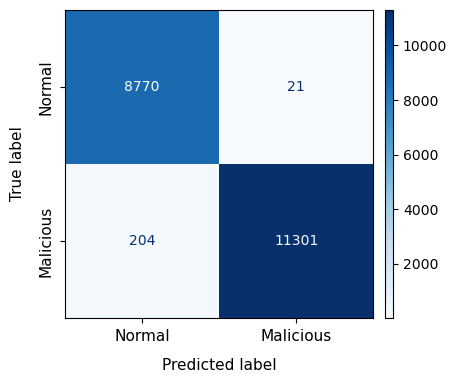

In [20]:
print("[METRICS] Random Forest Classifier (Validation Set)")
compute_metrics(y_val, pred)

print("\n[CMATRIX] Random Forest Confusion Matrix (Validation Set)")
conf_matrix(y_val, pred, 1)

-------

# Explainable AI Techniques (XAI)

In [21]:
# Load the saved Random Forest model
model_folder = "Saved-Models/"
model_filename = "IoMT_AI_IDS_RF_Random_Forest_Model.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

In [22]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]

## LIME

In [23]:
lime = LimeTabular(model=model, data=X_train, feature_names=feature_names, class_names=class_names)
lime_local = lime.explain_local(X_test[-50:], y_test[-50:], name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/1975227586192/ -->

## SHAP

In [24]:
shap.initjs()

explainer = shap.TreeExplainer(model)
#explainer = shap.Explainer(model)

start_index = 1
end_index = 50

shap_values = explainer.shap_values(X_test[start_index:end_index])
shap_values_explainer = explainer(X_test[start_index:end_index])

prediction = model.predict(X_test[start_index:end_index])[0]

In [25]:
#shap.plots.waterfall(shap_values[0])

In [26]:
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test[start_index:end_index], feature_names=feature_names)

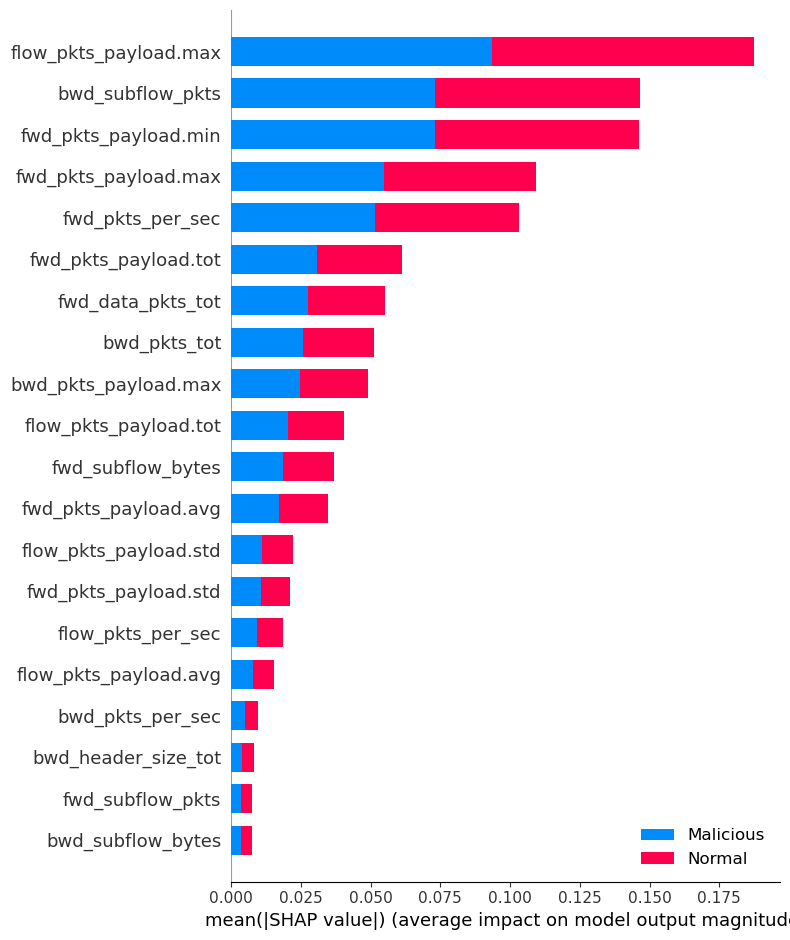

In [27]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names,class_names=class_names)

TypeError: object of type 'LinearSegmentedColormap' has no len()

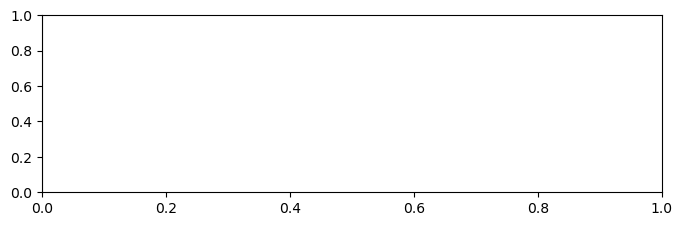

In [28]:
shap_values_reshaped = shap_values_explainer[:, 0, :]
shap.plots.beeswarm(shap_values_reshaped)

In [ ]:
shap.plots.force(explainer.expected_value[1],shap_values[1],feature_names=feature_names)

explainer = shap.Explainer(model)
shap_values = explainer(X_test)